In [2]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib as mpl
import numpy as np 

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [3]:
df = pd.read_csv('train_ben.csv')

In [4]:
df.describe()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,E_coh (MPa),T_g (K),R_gyr (A^2),Densities (kg/m^3),E_coh_bin,T_g_bin,R_gyr_bin,Densities_bin,smiles_lenght
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,560.195630,317.878114,1.313937e-19,1129.886987,0.500000,0.500000,0.500000,0.500000,29.800000
std,118.501055,118.501055,118.501055,118.501055,118.501055,118.501055,154.255325,54.945007,1.633922e-19,157.443424,0.500611,0.500611,0.500611,0.500611,13.866602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.359557,196.493712,1.383725e-20,157.166117,0.000000,0.000000,0.000000,0.000000,4.000000
25%,102.250000,102.250000,102.250000,102.250000,102.250000,102.250000,471.353107,278.700144,7.201439e-20,1045.068583,0.000000,0.000000,0.000000,0.000000,21.000000
50%,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,550.250058,319.636715,9.704992e-20,1132.256118,0.500000,0.500000,0.500000,0.500000,26.000000
75%,306.750000,306.750000,306.750000,306.750000,306.750000,306.750000,629.562207,360.126148,1.494501e-19,1196.112755,1.000000,1.000000,1.000000,1.000000,36.000000
max,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,1325.912207,754.456201,2.264474e-18,1842.109784,1.000000,1.000000,1.000000,1.000000,85.000000


In [5]:
df_properties = df[['E_coh (MPa)', 'T_g (K)', 'R_gyr (A^2)','Densities (kg/m^3)']]
df_properties.median()

E_coh (MPa)           5.502501e+02
T_g (K)               3.196367e+02
R_gyr (A^2)           9.704992e-20
Densities (kg/m^3)    1.132256e+03
dtype: float64

2.2644738571399256e-18
0.9902439024390244


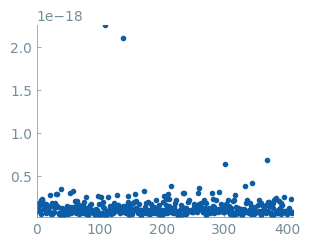

In [22]:
plt.scatter(range(len(df_properties['R_gyr (A^2)'])), df_properties['R_gyr (A^2)'])
print(max(df_properties['R_gyr (A^2)']))

print(len([i for i in df_properties['R_gyr (A^2)'] if i < 0.5e-18]) / len(df_properties['R_gyr (A^2)']))

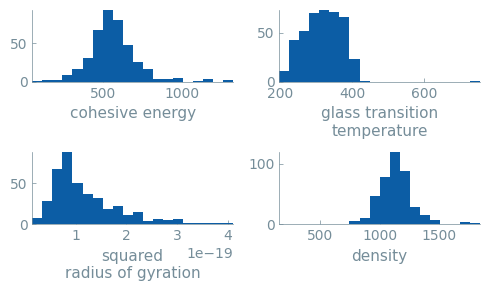

In [21]:
titles = {'E_coh (MPa)': 'cohesive energy', 
          'T_g (K)': 'glass transition\ntemperature', 
          'R_gyr (A^2)': 'squared\nradius of gyration',
          'Densities (kg/m^3)': 'density'}
fig, axes = plt.subplots(2,2, tight_layout = True, figsize = (5,3))
for i, prop in zip(axes.flatten(), list(df_properties.columns)):
    if prop == 'R_gyr (A^2)':
        i.hist([i for i in df_properties[prop] if i < 0.5e-18], bins = 20)
    else:
        i.hist(df_properties[prop], bins = 20)
    i.set_xlabel(titles[prop])

plt.savefig('monomers_histograms.pdf', bbox_inches = 'tight')

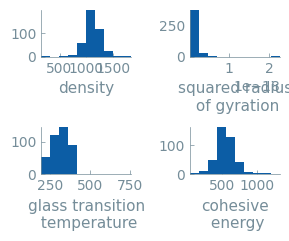

In [7]:
titles = {'E_coh (MPa)': 'cohesive\n energy', 
          'T_g (K)': 'glass transition\n temperature', 
          'R_gyr (A^2)': 'squared radius\n of gyration',
          'Densities (kg/m^3)': 'density'}
fig, axes = plt.subplots(2,2, tight_layout = True, figsize = (3,2.5))
for i, prop in zip(axes.flatten(), list(df_properties.columns)[::-1]):
    i.hist(df_properties[prop])
    i.set_xlabel(titles[prop])

plt.savefig('monomers_histograms_forPPT.pdf', bbox_inches = 'tight')

In [8]:
df['SMILES_dens'] = [f'{sm} with density of {density} kg/m3' for sm, density in zip(df['SMILES'], df['Densities (kg/m^3)'])]
df

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SMILES,E_coh (MPa),T_g (K),R_gyr (A^2),Densities (kg/m^3),E_coh_bin,T_g_bin,R_gyr_bin,Densities_bin,smiles_lenght,SMILES_dens
0,0,0,0,0,0,0,C=CC(=O)OCC(CC)CCCC,328.553579,224.988815,1.019758e-19,887.150214,0,0,1,0,19,C=CC(=O)OCC(CC)CCCC with density of 887.150214...
1,1,1,1,1,1,1,C=C(C)C(=O)Nc1ccccc1OCC,492.400248,288.504497,8.802318e-20,1070.953707,0,0,0,0,23,C=C(C)C(=O)Nc1ccccc1OCC with density of 1070.9...
2,2,2,2,2,2,2,C=CC(=O)Nc1ccc(C(=O)OCC)cc1Br,524.092875,333.727473,1.217450e-19,1437.640831,0,1,1,1,29,C=CC(=O)Nc1ccc(C(=O)OCC)cc1Br with density of ...
3,3,3,3,3,3,3,C=CCNC(=O)c1ccc(NC(=O)C=C)cc1,660.225398,331.387106,1.472457e-19,1156.062193,1,1,1,1,29,C=CCNC(=O)c1ccc(NC(=O)C=C)cc1 with density of ...
4,4,4,4,4,4,4,C=CC(=O)N1c2cc(C)c(C)cc2C2=C(SC(C(=O)OC)=C(C(=...,383.221978,394.792010,1.803750e-19,1250.410321,0,1,1,1,85,C=CC(=O)N1c2cc(C)c(C)cc2C2=C(SC(C(=O)OC)=C(C(=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,405,405,405,405,405,405,C=CC(=O)OCCCC,372.590257,214.869834,6.940310e-20,904.688151,0,0,0,0,13,C=CC(=O)OCCCC with density of 904.688150937983...
406,406,406,406,406,406,406,C=CC(=O)Nc1cccc(F)c1,644.214936,296.051417,7.569291e-20,1058.276087,1,0,0,0,20,C=CC(=O)Nc1cccc(F)c1 with density of 1058.2760...
407,407,407,407,407,407,407,C=CC(=O)OCCCCOc1ccc(SC)cc1,538.784442,291.365626,2.204329e-19,1124.683769,0,0,1,0,26,C=CC(=O)OCCCCOc1ccc(SC)cc1 with density of 112...
408,408,408,408,408,408,408,C=CCN(C(=O)C=C)C(C)C,441.559400,240.204474,5.694572e-20,795.778832,0,0,0,0,20,C=CCN(C(=O)C=C)C(C)C with density of 795.77883...


In [9]:
df.to_csv('train_ben.csv')